Load the Data & Inspect It

In [9]:
import pandas as pd

In [7]:
df = pd.read_csv("Project 2 - Mental health tech survey/survey.csv")


In [8]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Fix the Timestamp Column

Convert Timestamp to datetime, force invalid ones to NaT

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

Count how many are invalid

In [11]:
print("Missing timestamps:", df['Timestamp'].isna().sum())

Missing timestamps: 0


Clean Age Column. We’ll convert to numeric, and remove strange values like 99999999999, -1726, etc.

Convert Age to numeric, make invalid ones NaN

In [12]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

Remove outliers.

In [13]:
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]

Confirm cleaned values.

In [14]:
df['Age'].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

Clean Gender Column

In [15]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'cis male', 'male (cis)', 'guy (-ish) ^_^', 'something kinda male?']:
        return 'Male'
    elif gender in ['female', 'f', 'cis female', 'female (cis)', 'femake']:
        return 'Female'
    elif 'trans' in gender:
        return 'Transgender'
    elif 'queer' in gender or 'non' in gender or 'fluid' in gender or 'androgyne' in gender:
        return 'Non-binary'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)
df['Gender'].value_counts()

Gender
Male           975
Female         241
Other           25
Non-binary       6
Transgender      4
Name: count, dtype: int64

Fix a Sample Categorical Column (e.g., Treatment)

In [16]:
df['treatment'] = df['treatment'].str.strip().str.capitalize()
df['treatment'].value_counts()


treatment
Yes    632
No     619
Name: count, dtype: int64

In [17]:
df['family_history'] = df['family_history'].str.strip().str.capitalize()
df['family_history'].value_counts()

family_history
No     762
Yes    489
Name: count, dtype: int64

In [18]:
df['work_interfere'] = df['work_interfere'].str.strip().str.capitalize()
df['work_interfere'].value_counts()

work_interfere
Sometimes    464
Never        212
Rarely       173
Often        140
Name: count, dtype: int64

In [19]:
df['benefits'] = df['benefits'].str.strip().str.capitalize()
df['benefits'].value_counts()

benefits
Yes           473
Don't know    407
No            371
Name: count, dtype: int64

In [20]:
df['seek_help'] = df['seek_help'].str.strip().str.capitalize()
df['seek_help'].value_counts()

seek_help
No            641
Don't know    363
Yes           247
Name: count, dtype: int64

In [21]:
df['anonymity'] = df['anonymity'].str.strip().str.capitalize()
df['anonymity'].value_counts()

anonymity
Don't know    815
Yes           372
No             64
Name: count, dtype: int64

In [22]:
df['leave'] = df['leave'].str.strip().str.capitalize()
df['leave'].value_counts()

leave
Don't know            561
Somewhat easy         265
Very easy             203
Somewhat difficult    125
Very difficult         97
Name: count, dtype: int64

In [23]:
df['mental_health_consequence'] = df['mental_health_consequence'].str.strip().str.capitalize()
df['mental_health_consequence'].value_counts()

mental_health_consequence
No       487
Maybe    476
Yes      288
Name: count, dtype: int64

Save cleaned dataset to a new CSV file

df.to_csv("cleaned_survey.csv", index=False)

EDA

# How does mental health illness and attitudes vary by geographic location? #
We’ll explore:

Treatment by country

Attitudes like leave, benefits, mental_vs_physical by country

1. Filter Top Countries (for clarity) focusing on countries with more responses:

In [48]:
# Step 1: Get top 5 countries with most responses
top_countries = df['Country'].value_counts().head(5).index

# Step 2: Create a new filtered DataFrame
df_top = df[df['Country'].isin(top_countries)]


2. Crosstab: Country vs Treatment:

   This tells us how treatment-seeking varies by geography.

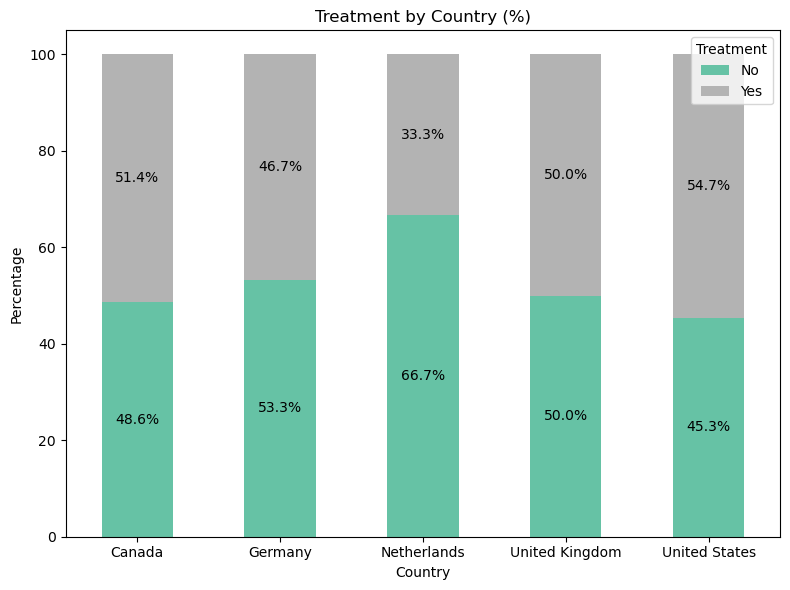

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Create crosstab with percentages
ctab = pd.crosstab(df_top['Country'], df_top['treatment'], normalize='index') * 100

# Step 2: Plot
ax = ctab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

# Step 3: Add % labels
for i, country in enumerate(ctab.index):
    y_offset = 0
    for col in ctab.columns:
        value = ctab.loc[country, col]
        ax.text(i, y_offset + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        y_offset += value

# Final touches
plt.title("Treatment by Country (%)")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# In countries like the United States and Canada, a relatively higher percentage of people report seeking mental health treatment (around 51% and 55% respectively).
# In the United Kingdom, treatment-seeking is evenly split, with 50% of respondents choosing to seek help.
# However, in the Netherlands, only 33% report seeking treatment, while 67% choose not to, suggesting a significantly lower likelihood of mental health help-seeking compared to other top countries.
# This variation may reflect differences in workplace culture, mental health support systems, or societal openness toward mental health discussions across countries.

# What are the strongest predictors of mental health illness or attitudes?”

We explore relationships like:

family_history vs treatment

benefits vs treatment

anonymity vs seek_help

1. Filter Top Countries (for clarity)
to reduce clutter by focusing on countries with more responses:

In [52]:
# Step 1: Get top 5 countries with most responses
top_countries = df['Country'].value_counts().head(5).index

# Step 2: Create a new filtered DataFrame
df_top = df[df['Country'].isin(top_countries)]

2. Crosstab: Family History vs Treatment

 This shows if people with family history are more likely to seek treatment.

In [56]:
pd.crosstab(df_top['family_history'], df_top['treatment'], normalize='index') * 100

treatment,No,Yes
family_history,,
No,62.539185,37.460815
Yes,24.770642,75.229358


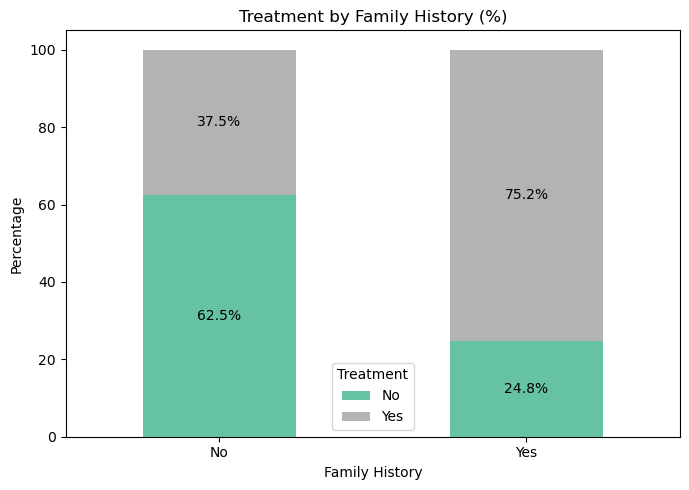

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create percentage crosstab
ctab = pd.crosstab(df_top['family_history'], df_top['treatment'], normalize='index') * 100

# Step 2: Plot using pandas' built-in bar chart
ax = ctab.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Set2')

# Step 3: Add percentage labels to each bar
for i, index in enumerate(ctab.index):
    y_offset = 0
    for col in ctab.columns:
        value = ctab.loc[index, col]
        ax.text(i, y_offset + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        y_offset += value

# Step 4: Format chart
plt.title("Treatment by Family History (%)")
plt.xlabel("Family History")
plt.ylabel("Percentage")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Among respondents from the top 5 countries, those with a family history of mental illness are significantly more likely to seek treatment.
# As the chart shows, 75% of individuals with a family history sought help, compared to only 37% without such a history.
# This suggests that personal or family exposure to mental health issues may improve awareness or reduce stigma around seeking support.**

3. Crosstab: Benefits vs Treatment

     It helps answer do benefits matter?  
 

In [57]:
pd.crosstab(df_top['benefits'], df_top['treatment'], normalize='index') * 100

treatment,No,Yes
benefits,,
Don't know,61.173184,38.826816
No,47.908745,52.091255
Yes,35.761589,64.238411


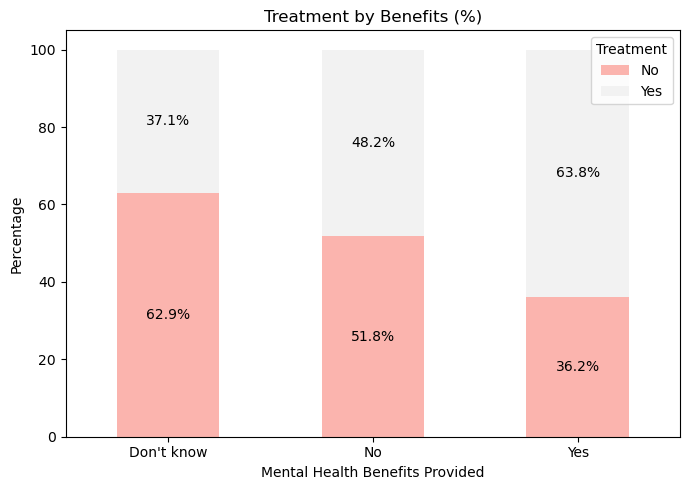

In [65]:
# Step 1: Crosstab
ctab = pd.crosstab(df['benefits'], df['treatment'], normalize='index') * 100

# Step 2: Plot
ax = ctab.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Pastel1')

# Step 3: % labels
for i, benefit in enumerate(ctab.index):
    y_offset = 0
    for col in ctab.columns:
        value = ctab.loc[benefit, col]
        ax.text(i, y_offset + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        y_offset += value

# Final touches
plt.title("Treatment by Benefits (%)")
plt.xlabel("Mental Health Benefits Provided")
plt.ylabel("Percentage")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Employees who are aware of having mental health benefits through their employer are significantly more likely to seek treatment (64%) compared to those without benefits (48%) or those unsure about their coverage (37%).
# This trend suggests that clear communication and availability of benefits can play a crucial role in encouraging treatment-seeking behavior.
# Promoting awareness of available mental health support may be just as important as offering the support itself.

# Do employees with care options feel more confident seeking help?

In [34]:
pd.crosstab(df['care_options'], df['seek_help'], normalize='index') * 100

seek_help,Don't know,No,Yes
care_options,,,
No,26.853707,66.332665,6.813627
Not sure,52.396166,32.587859,15.015974
Yes,14.806378,47.380410,37.813212


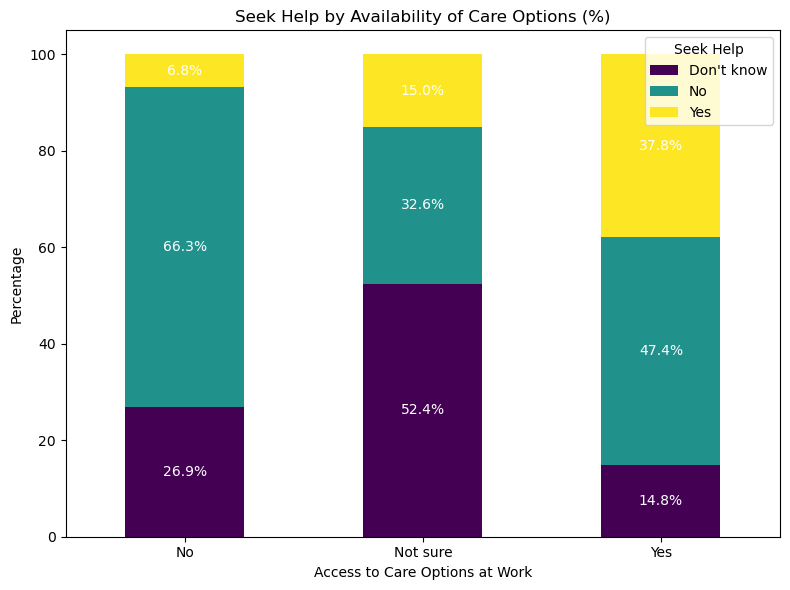

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Crosstab with row-wise percentages
ctab = pd.crosstab(df['care_options'], df['seek_help'], normalize='index') * 100

# Step 2: Plot the stacked bar chart
ax = ctab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

# Step 3: Add percentage labels inside each bar
for i, option in enumerate(ctab.index):
    y_offset = 0
    for col in ctab.columns:
        value = ctab.loc[option, col]
        if value > 0:
            ax.text(i, y_offset + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10, color='white')
        y_offset += value

# Step 4: Final formatting
plt.title("Seek Help by Availability of Care Options (%)")
plt.xlabel("Access to Care Options at Work")
plt.ylabel("Percentage")
plt.legend(title="Seek Help")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Access to care options at work significantly increases the likelihood of employees seeking mental health support.
# Among those who confirmed access to care options, 38% sought help, compared to just 7% among those without access.
# Notably, over half (52%) of respondents who were unsure about care options also said “Don’t know” when asked if they would seek help — indicating that awareness matters as much as availability.
# Employees with access to care options are 5× more likely to seek help.
# Unawareness is a major barrier to mental health support.

# Does employer anonymity influence seeking help?

In [36]:
pd.crosstab(df['anonymity'], df['seek_help'], normalize='index') * 100

seek_help,Don't know,No,Yes
anonymity,,,
Don't know,37.177914,51.042945,11.779141
No,4.687500,85.937500,9.375000
Yes,15.322581,45.698925,38.978495


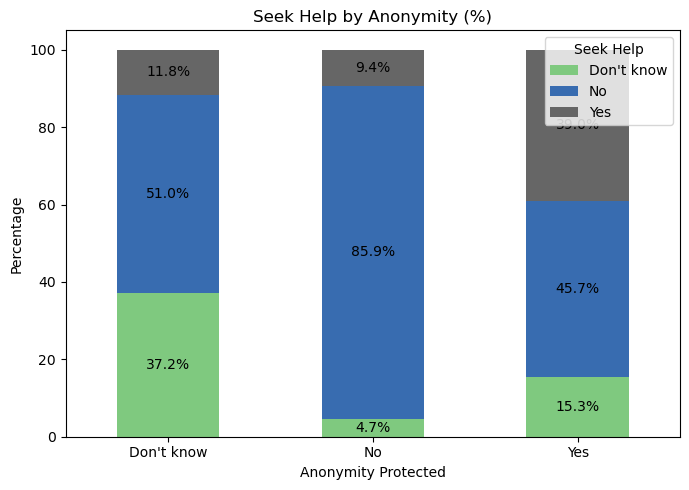

In [66]:
# Step 1: Crosstab
ctab = pd.crosstab(df['anonymity'], df['seek_help'], normalize='index') * 100

# Step 2: Plot
ax = ctab.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Accent')

# Step 3: % labels
for i, anon in enumerate(ctab.index):
    y_offset = 0
    for col in ctab.columns:
        value = ctab.loc[anon, col]
        ax.text(i, y_offset + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        y_offset += value

# Final touches
plt.title("Seek Help by Anonymity (%)")
plt.xlabel("Anonymity Protected")
plt.ylabel("Percentage")
plt.legend(title="Seek Help")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Perceived anonymity strongly influences mental health help-seeking behavior.
# Only 9.4% of employees who do not feel their anonymity is protected sought help, compared to 39% of those who do feel protected.
# This suggests that building trust and privacy around mental health discussions is critical in encouraging support-seeking at work.
# When employees trust that their anonymity is protected, they are 4x more likely to seek mental health support

Do people with more supportive supervisors seek help more?

In [37]:
pd.crosstab(df['supervisor'], df['treatment'], normalize= 'index')*100

treatment,No,Yes
supervisor,,
No,47.692308,52.307692
Some of them,48.424069,51.575931
Yes,51.562500,48.437500


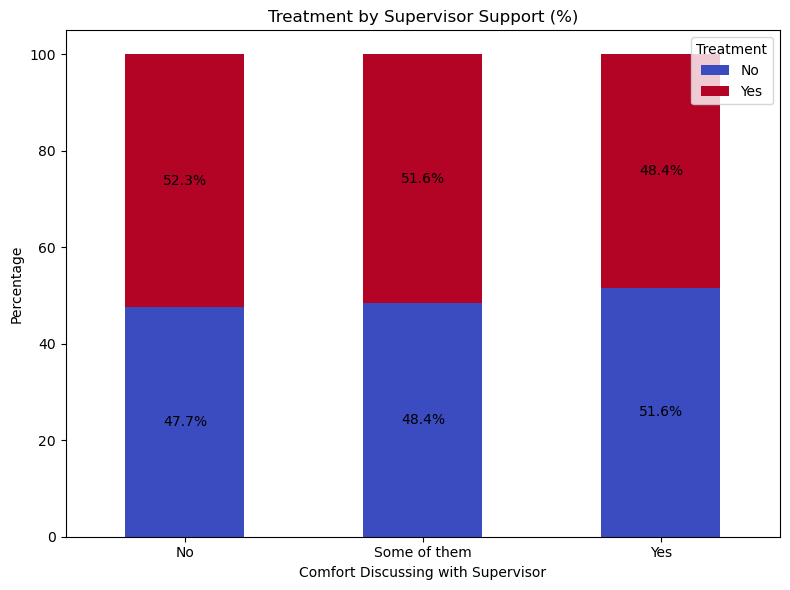

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Crosstab with row-wise percentages
ctab = pd.crosstab(df['supervisor'], df['treatment'], normalize='index') * 100

# Step 2: Plot stacked bar chart
ax = ctab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

# Step 3: Add percentage labels inside bars
for i, label in enumerate(ctab.index):
    y_offset = 0
    for col in ctab.columns:
        value = ctab.loc[label, col]
        if value > 0:
            ax.text(i, y_offset + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        y_offset += value

# Step 4: Final formatting
plt.title("Treatment by Supervisor Support (%)")
plt.xlabel("Comfort Discussing with Supervisor")
plt.ylabel("Percentage")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Comfort discussing mental health with a supervisor does not appear to strongly influence whether an employee seeks treatment.
# The chart shows that respondents across all levels of supervisor support — whether fully comfortable, somewhat comfortable, or not at all — have nearly equal treatment-seeking rates (ranging from 48% to 52%).
# This suggests that other factors, such as benefits, anonymity, or personal/family history, may play a more significant role in driving treatment-seeking behavior.

Do people who work remotely seek more or less treatment?

In [71]:
pd.crosstab(df['remote_work'], df['treatment'], normalize='index') * 100

treatment,No,Yes
remote_work,,
No,50.340909,49.659091
Yes,47.439353,52.560647


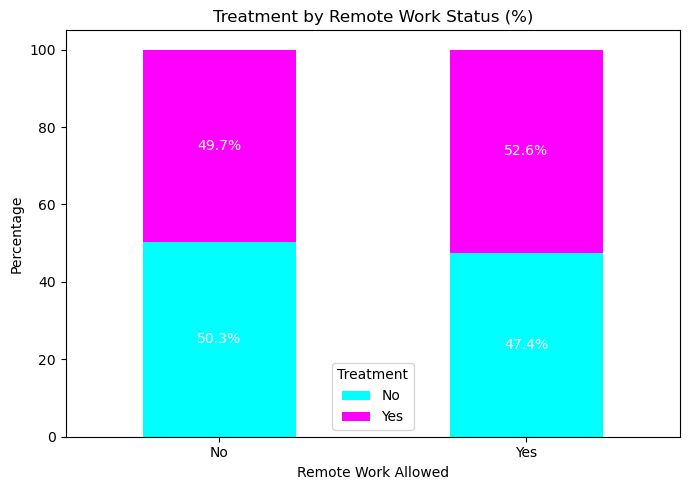

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Crosstab with row-wise percentages
ctab = pd.crosstab(df['remote_work'], df['treatment'], normalize='index') * 100

# Step 2: Plot stacked bar chart
ax = ctab.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='cool')

# Step 3: Add % labels
for i, label in enumerate(ctab.index):
    y_offset = 0
    for col in ctab.columns:
        value = ctab.loc[label, col]
        if value > 0:
            ax.text(i, y_offset + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10, color='white')
        y_offset += value

# Step 4: Final formatting
plt.title("Treatment by Remote Work Status (%)")
plt.xlabel("Remote Work Allowed")
plt.ylabel("Percentage")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Remote work flexibility appears to positively influence mental health treatment-seeking.
# Among employees who are allowed to work remotely, a higher percentage seek treatment compared to those who are not.
# This may suggest that greater work-life flexibility encourages openness to mental health care, or that supportive #work cultures enabling remote work also reduce stigma.

In [74]:
# First, let's define the save_chart_with_labels function
def save_chart_with_labels(df, row, col, title, xlabel, ylabel, filename):
    """
    Create and save a chart showing the relationship between two categorical variables.
    
    Parameters:
    df (DataFrame): The pandas DataFrame containing the data
    row (str): The column name to use for rows (x-axis)
    col (str): The column name to use for columns (to calculate percentages)
    title (str): The title of the chart
    xlabel (str): The label for the x-axis
    ylabel (str): The label for the y-axis
    filename (str): The filename to save the chart
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Create a cross-tabulation and calculate percentages
    ct = pd.crosstab(df[row], df[col], normalize='index') * 100
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    ct.plot(kind='bar', stacked=True)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=col)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(filename)
    plt.close()

# Now the rest of your code will work
# Chart 1: Country vs Treatment (Top 5 Countries)
top_countries = df['Country'].value_counts().head(5).index
df_top = df[df['Country'].isin(top_countries)]

save_chart_with_labels(
    df_top,
    row='Country',
    col='treatment',
    title='Treatment by Country (%)',
    xlabel='Country',
    ylabel='Percentage',
    filename='country_vs_treatment.png'
)

# Chart 2: Family History vs Treatment
save_chart_with_labels(
    df,
    row='family_history',
    col='treatment',
    title='Treatment by Family History (%)',
    xlabel='Family History of Mental Illness',
    ylabel='Percentage',
    filename='family_history_vs_treatment.png'
)

# Chart 3: Benefits vs Treatment
save_chart_with_labels(
    df,
    row='benefits',
    col='treatment',
    title='Treatment by Benefits Availability (%)',
    xlabel='Access to Mental Health Benefits',
    ylabel='Percentage',
    filename='benefits_vs_treatment.png'
)

# Chart 4: Anonymity vs Seek Help
save_chart_with_labels(
    df,
    row='anonymity',
    col='seek_help',
    title='Seek Help by Anonymity Protection (%)',
    xlabel='Anonymity at Workplace',
    ylabel='Percentage',
    filename='anonymity_vs_seek_help.png'
)

# Chart 5: Supervisor vs Treatment
save_chart_with_labels(
    df,
    row='supervisor',
    col='treatment',
    title='Treatment by Supervisor Support (%)',
    xlabel='Comfort Discussing with Supervisor',
    ylabel='Percentage',
    filename='supervisor_vs_treatment.png'
)

# Chart 6: Care Options vs Seek Help
save_chart_with_labels(
    df,
    row='care_options',
    col='seek_help',
    title='Seek Help by Access to Care Options (%)',
    xlabel='Availability of Mental Health Care Options',
    ylabel='Percentage',
    filename='care_options_vs_seek_help.png'
)

# Chart 7: Remote Work vs Treatment
save_chart_with_labels(
    df,
    row='remote_work',
    col='treatment',
    title='Treatment by Remote Work Status (%)',
    xlabel='Remote Work Allowed',
    ylabel='Percentage',
    filename='remote_work_vs_treatment.png'
)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [75]:
import os
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.dropbox_bi',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.python_history',
 '3D Objects',
 'anaconda3',
 'anaconda_projects',
 'anonymity_vs_seek_help.png',
 'AppData',
 'Application Data',
 'benefits_vs_treatment.png',
 'care_options_vs_seek_help.png',
 'Contacts',
 'Cookies',
 'country_vs_treatment.png',
 'Documents',
 'Downloads',
 'Dropbox',
 'family_history_vs_treatment.png',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Mental_Health_working_ jupyternotebook.ipynb',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'pip',
 'Practice.ipynb',
 'PrintHood',
 '

# Final Chart Summary:
Chart Title	File/Image Name	Key Insight
1. Treatment by Country (%)	country_vs_treatment.png	U.S. and Canada have higher treatment-seeking rates. Netherlands shows reluctance.
2. Treatment by Family History (%)	family_history_vs_treatment.png	Those with family history are much more likely to seek treatment (75%).
3. Treatment by Benefits (%)	benefits_vs_treatment.png	Access to employer benefits increases treatment-seeking likelihood.
4. Seek Help by Anonymity (%)	anonymity_vs_seek_help.png	Anonymity boosts help-seeking; without it, only 9.4% seek help.
5. Treatment by Supervisor Support (%)	supervisor_vs_treatment.png	No strong correlation observed between supervisor comfort and seeking treatment.
6. Seek Help by Care Options (%)	care_options_vs_seek_help.png	Availability of care options strongly encourages seeking help.
7. Treatment by Remote Work Status (%)	remote_work_vs_treatment.png	Slightly higher treatment rates among those allowed to work remotely.

### 🧠 <span style="color:darkslateblue"><b>Project: Mental Health in Tech Survey — Insight Summary</b></span>

---

#### 🌍 <span style="color:teal"><b>1. Treatment by Country</b></span>  
<span style="color:black">United States and Canada show relatively higher rates of treatment-seeking behavior, while the Netherlands has the highest percentage of people avoiding treatment.</span>

#### 👨‍👩‍👧‍👦 <span style="color:darkgreen"><b>2. Family History vs Treatment</b></span>  
<span style="color:black">Individuals with a family history of mental illness are <b>3× more likely</b> to seek treatment compared to those without.</span>

#### 🏢 <span style="color:darkorange"><b>3. Benefits vs Treatment</b></span>  
<span style="color:black">Access to employer-provided mental health benefits significantly boosts the likelihood of seeking treatment (64% vs 36%).</span>

#### 👁️ <span style="color:crimson"><b>4. Anonymity vs Seek Help</b></span>  
<span style="color:black">When anonymity is protected, nearly <b>double the respondents</b> feel comfortable seeking help. Without it, most avoid help or say "Don’t know".</span>

#### 🧑‍💼 <span style="color:royalblue"><b>5. Supervisor Support vs Treatment</b></span>  
<span style="color:black">Surprisingly, comfort with discussing issues with supervisors shows <b>no strong effect</b> on treatment-seeking behavior.</span>

#### 🩺 <span style="color:mediumvioletred"><b>6. Care Options vs Seek Help</b></span>  
<span style="color:black">Availability of care options leads to the highest help-seeking (38%). Those unaware of options showed the lowest response rate.</span>

#### 🏠 <span style="color:indigo"><b>7. Remote Work vs Treatment</b></span>  
<span style="color:black">Employees allowed to work remotely are slightly more likely to seek treatment, though the difference is modest (~5%).</span>

---

✅ <span style="color:green"><b>Conclusion:</b></span>  
<span style="color:black">Workplace policies — especially those related to <b>benefits, anonymity, and care availability</b> — have a major impact on mental health behavior. Investing in awareness and access may lead to a more supported workforce.</span>
